<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 4 Section 2</p><br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
flight_df = pd.read_csv(r'D:\machinelearning\flights.csv')

In [10]:
flight_df['time_hour'] = pd.to_datetime(flight_df['time_hour'])
flight_df.set_index('time_hour', inplace=True)

<span style="font-wight:bold;font-size:20px">1. Answering Questions from Data:</span> Download the data from [ 
https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/flights.csv ]. Answer the following questions using this data.


a) What month had the highest proportion of cancelled flights? What month had the lowest? Interpretany seasonal patterns. Please produce a plot that illustrates the proportion of cancelled flights for each month.

In [17]:
#TODO
delay_per_month = flight_df.groupby('month').count()
max_delay_month = delay_per_month['dep_delay'].idxmax()
max_delay = delay_per_month['dep_delay'].max()
print("the most delay is : ",  max_delay)
print("the most delay belongs to : ",  max_delay_month)

the most delay is :  28841
the most delay belongs to :  8


b) What plane (specified by the tailnum variable) traveled the most times from New York City airports in 2013? Plot the number of trips per week over the year.

In [30]:
#TODO
airplane = flight_df.groupby('tailnum').count()
max_airplane = airplane['year'].idxmax()
max_airplane

'N725MQ'

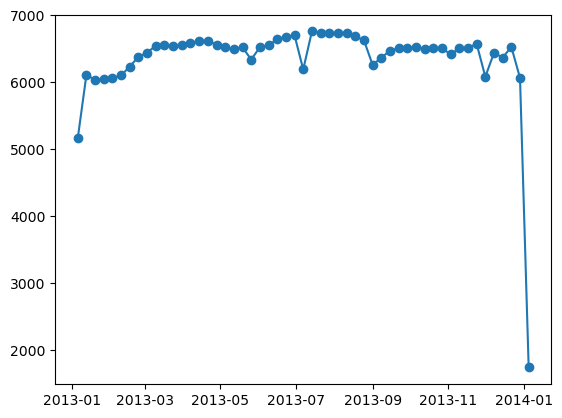

In [74]:
weekly_data = flight_df.resample('W').count()
weekly_data
plt.plot(weekly_data.index, weekly_data['year'], marker='o', linestyle='-')

c) Download the plane data from [ https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/planes.csv ]. Use the flights and planes tables to answer the following questions: What is the oldest plane (specified by the tailnum variable) that flew from New York City airports in 2013? How many airplanes that flew from New York City are included in the planes table?

In [82]:
#TODO
plane_df = pd.read_csv(r'D:\machinelearning\planes.csv')
print("planes : ", plane_df.columns)
print("flights : ", flight_df.columns)
plane_col_list = plane_df.columns.to_list()
flight_col_list = flight_df.columns.to_list()

matual_col = []
for i in range(len(plane_col_list)):
    for j in range(len(flight_col_list)):
        if plane_col_list[i] == flight_col_list[j]:
            matual_col.append(plane_col_list[i])
            
print("matual_col : ", matual_col)

planes :  Index(['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats',
       'speed', 'engine'],
      dtype='object')
flights :  Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
matual_col :  ['tailnum', 'year']


In [93]:
sorted(plane_df['year'].unique())
plane_df_13 = plane_df[plane_df['year'] == 2013.0]
plane_df_13

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
215,N150UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2.0,199.0,NaN,Turbo-fan
216,N151UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2.0,199.0,NaN,Turbo-fan
218,N152UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2.0,199.0,NaN,Turbo-fan
221,N153UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2.0,199.0,NaN,Turbo-fan
223,N154UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2.0,199.0,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
2801,N8620H,2013.0,Fixed wing multi engine,BOEING,737-8H4,2.0,140.0,NaN,Turbo-fan
2802,N8621A,2013.0,Fixed wing multi engine,BOEING,737-8H4,2.0,140.0,NaN,Turbo-fan
2919,N903JB,2013.0,Fixed wing multi engine,AIRBUS,A321-231,2.0,379.0,NaN,Turbo-fan
2945,N907JB,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2.0,379.0,NaN,Turbo-fan


d) Use the flights and planes tables to answer the following questions: How many planes have a missing date of manufacture? What are the five most common manufacturers (Note: pay close attention to the same manufacturer being represented multiple times)? Has the distribution of manufacturer changed over time as reflected by the airplanes flying from NYC in 2013? Produce a plot that backs up your claim.

In [104]:
#TODO
plane_flight_df = pd.merge(flight_df, plane_df_13, how="right", on=['tailnum', 'year'])
plane_flight_df['date'] = pd.to_datetime(plane_flight_df['year'].astype(int).astype(str) + '-' +
                            plane_flight_df['month'].astype(int).astype(str) + '-' +
                            plane_flight_df['day'].astype(int).astype(str), format='%Y-%m-%d')
plane_flight_df.set_index('date', inplace=True)

In [109]:
start_date = plane_flight_df.index.min()
end_date = plane_flight_df.index.max()
complete_date_range = pd.date_range(start=start_date, end=end_date, freq='D') 
missing_dates = complete_date_range[~complete_date_range.isin(plane_flight_df.index)]
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2013-01-19', '2013-01-20', '2013-01-21', '2013-01-22',
               '2013-01-23', '2013-01-24', '2013-01-25', '2013-01-26',
               '2013-01-27', '2013-01-28', '2013-01-29', '2013-01-30',
               '2013-01-31', '2013-02-01', '2013-02-02', '2013-02-04',
               '2013-02-05', '2013-02-06', '2013-02-07', '2013-02-08',
               '2013-02-09', '2013-02-10', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17', '2013-02-20', '2013-02-21',
               '2013-02-23', '2013-02-24', '2013-02-25', '2013-03-25',
               '2013-03-29', '2013-04-11'],
              dtype='datetime64[ns]', freq=None)


In [123]:
top5_manufacturer = plane_flight_df['manufacturer'].value_counts().head(5)
top5_manufacturer

EMBRAER             1642
BOEING              1512
AIRBUS              1045
BOMBARDIER INC       411
AIRBUS INDUSTRIE      20
Name: manufacturer, dtype: int64

In [125]:
plane_flight_df['manufacturer'].value_counts()

EMBRAER             1642
BOEING              1512
AIRBUS              1045
BOMBARDIER INC       411
AIRBUS INDUSTRIE      20
Name: manufacturer, dtype: int64

In [126]:
def plot_hist(df, column_name):
    plt.figure(figsize = (9,3))
    plt.hist(df[column_name].value_counts(), bins=10, color='skyblue')
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"{column_name} distribution with hist")
    plt.show()

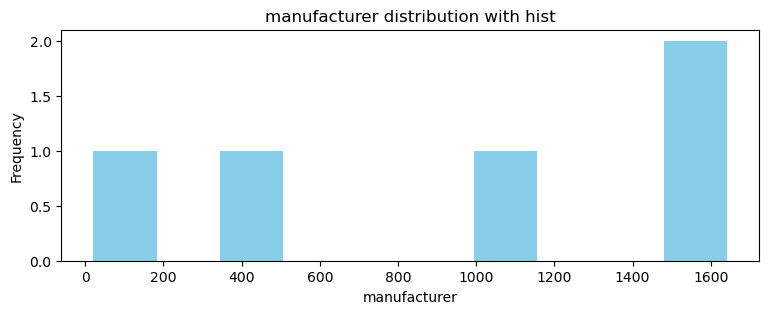

In [127]:
plot_hist(plane_flight_df, 'manufacturer')

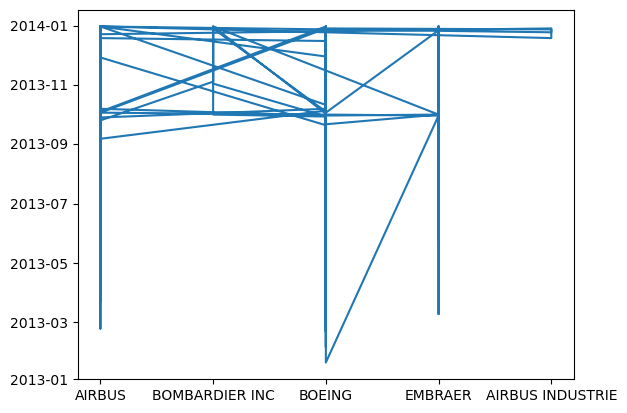

In [136]:
list_man = plane_flight_df['manufacturer'].to_list()
plt.plot(list_man, plane_flight_df.index)

## 2. **Working with datetime data;** The object `myDate` contains the date and time. Based on this object answer the following questions and type the answer after your findings.

In [142]:
myDate = "2022-10-01 09:42:43"

a. Convert `myDate` into a datetime object with Iran time zone. Display the result.

In [140]:
pip install pytz


Note: you may need to restart the kernel to use updated packages.


In [143]:
import datetime
import pytz

iran_tz = pytz.timezone('Asia/Tehran')
myDatetime = datetime.datetime.strptime(myDate, '%Y-%m-%d %H:%M:%S').replace(tzinfo=iran_tz)
myDatetime

datetime.datetime(2022, 10, 1, 9, 42, 43, tzinfo=<DstTzInfo 'Asia/Tehran' LMT+3:26:00 STD>)

b. Write your codes so that it displays the week day and also the month of `myDate`.

In [145]:
# TODO
day_of_week = myDatetime.strftime('%A')
month = myDatetime.strftime('%B')
print("Day of the week:", day_of_week)
print("Month:", month)


Day of the week: Saturday
Month: October


c. What weekday and the month is it after exactly 100 years from `myDate`?

In [149]:
# TODO
from dateutil.relativedelta import relativedelta
from dateutil import parser

future_date = myDatetime + relativedelta(years=100)
future_day_of_week = future_date.strftime('%A') 
future_month = future_date.strftime('%B') 
print("100 years from now, it will be a", future_day_of_week)
print("In the month of", future_month)

100 years from now, it will be a Thursday
In the month of October


d. Add two month with myDate and display the resulting date time.

In [150]:
# TODO
myDatetime = parser.parse(myDate).astimezone(iran_tz)
future_date = myDatetime + relativedelta(months=2)
print("After adding two months:", future_date)


After adding two months: 2022-12-01 09:42:43+03:30


e. Suppose this homework is due on December 23, 2022 by 11.59PM. Compute and display how many seconds you got to complete this homework? Also compute the hours.

In [153]:
# TODO
from datetime import datetime

current_datetime = datetime.now()
current_datetime = datetime.now()
deadline_datetime = datetime(2022, 12, 23, 23, 59, 0)
time_difference = deadline_datetime - current_datetime
seconds_left = time_difference.total_seconds()
hours_left = seconds_left / 3600  
print("Seconds left to complete the homework:", seconds_left)
print("Hours left to complete the homework:", hours_left)

Seconds left to complete the homework: -23994607.610924
Hours left to complete the homework: -6665.168780812222


f. For the years `2021` & `2022`, count the number of weekends. Which year has the highest number of Weekends?

In [158]:
# TODO
import datetime

def count_weekends(year):
    total_weekends = 0
    # Iterate through the days in the given year
    for month in range(1, 13):  # 12 months
        for day in range(1, 32):  # Max 31 days in a month
            try:
                # Create a datetime object for the current day
                current_date = datetime.date(year, month, day)
                # Check if the day is a Saturday (5) or Sunday (6)
                if current_date.weekday() in [5, 6]:
                    total_weekends += 1
            except ValueError:
                # Handle invalid dates (e.g., February 30)
                pass
    return total_weekends

In [159]:
weekends_2021 = count_weekends(2021)
weekends_2022 = count_weekends(2022)
if weekends_2021 > weekends_2022:
    highest_year = 2021
    highest_count = weekends_2021
elif weekends_2022 > weekends_2021:
    highest_year = 2022
    highest_count = weekends_2022
else:
    highest_year = None
    highest_count = 0

print("Number of weekends in 2021:", weekends_2021)
print("Number of weekends in 2022:", weekends_2022)

if highest_year:
    print(f"{highest_year} has the highest number of weekends with {highest_count} weekends.")
else:
    print("Both 2021 and 2022 have the same number of weekends.")

Number of weekends in 2021: 104
Number of weekends in 2022: 105
2022 has the highest number of weekends with 105 weekends.


g. What is the month(MM) and day(DD) on the `305`th day of the current year?

In [160]:
# TODO
current_year = datetime.date.today().year
target_date = datetime.date(current_year, 1, 1) + datetime.timedelta(days=304)
month_MM = target_date.strftime('%m')  
day_DD = target_date.strftime('%d')     

print("Month (MM):", month_MM)
print("Day (DD):", day_DD)

Month (MM): 11
Day (DD): 01


h. The Date `2022-10-20` is formatted `YYYY-MM-DD`, format it into `MM-DD-YYYY`

In [162]:
# TODO
from datetime import datetime

input_date = "2022-10-20"
date_obj = datetime.strptime(input_date, '%Y-%m-%d')
formatted_date = date_obj.strftime('%m-%d-%Y')
formatted_date

'10-20-2022'

i. Find if the Date on the question above is the weekend or a weekday.

In [163]:
# TODO
from datetime import datetime


input_date = "2022-10-20"
date_obj = datetime.strptime(input_date, '%Y-%m-%d')
weekday_number = date_obj.weekday()
if weekday_number in [5, 6]:
    day_type = "weekend"
else:
    day_type = "weekday"


print(f"The date {input_date} is a {day_type}.")

The date 2022-10-20 is a weekday.


## 3. **Walmart Sales Analysis:** load and read the dataset `walmart_sales.csv` and `walmart_fuel_prices.csv`.

We will follow the following data description when working with the above 2 datasets:

 * `index:` index is a default value of count
 * `Store:` Store is represented in number ID(1,2,3,4,...)
 * `Dept:` Dept is Department in each Store represented in number ID (1,2,3,4,...)
 * `Date:` Date is in YYYY-MM-DD char format - *needs to be converted into Date data type*
 * `Weekly_Sales:` Sales of a given Dept in a given Store for the Date
 * `Temperature:` Average temperature on the Date at given Store region
 * `Fuel_Price:` Cost of the Fuel on the given Date at a given Store
 * `IsHoliday:` Is the given Date a holiday Week? 

In [7]:
# TODO
wlmrt_sales = pd.read_csv(r'D:\machinelearning\walmart_sales.csv')
wlmrt_fuel_sales = pd.read_csv(r'D:\machinelearning\PET_PRI_GND_DCUS_NUS_W.csv')
# wlmrt_sale

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 0: invalid continuation byte

 a. For both datasets, breakdown the `Date` column and create additional new columns `Year`, `Month`, and `Day`. You should now have additional 3 new columns in your both dataset. Report only the column names for both the dataset.

In [12]:
# TODO

b. In `walmart_sales`: which `Month(s)` of `Year` have the highest `Weekly_Sales`? Report the Year, Month, Store, and Dept.

In [13]:
# TODO

c. In `walmart_sales`: calculate the average monthly sales by Department for each Store. Which Store(s) has the highest average monthly sales on the department(s)? Report the Store, Department, Date.

In [14]:
# TODO

d. In `walmart_sales`: which month of year `2011` has the highest overall sales by Store? Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. After that do the same for `2012`. Does the highest sales per month fall on the same holiday for both years? Report your findings for both year.

In [15]:
# TODO

 e. In `walmart_sales`: report the lowest sales per month for the year `2011` for `IsHoliday == TRUE`. Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Do the same for `2012` and report if the lowest sales are on the same month.

In [16]:
# TODO

f. In `walmart_sales`: We have 45 unique stores. Generate a nice plot on the total sales by store for the year `2012`. Report the Store number.

In [17]:
# TODO

g. In `walmart_fuel_prices`: For the year `2011` do you think higher the `temperature` relates to higher `fuel price`? Support your answer with a nice plot.

In [18]:
# TODO

 h. In `walmart_fuel_prices`: For the year `2010` which `Store` had the lowest Fuel Price? Report the `month` and `temperature`. On the same `month`, what was the highest fuel price for the store? Report the difference.

In [19]:
# TODO

i. In `walmart_fuel_prices`: For the `IsHoliday == TRUE`, which month has the lowest `Fuel Price` for the year `2012`? name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Also report month of the highest fuel price and name of the holiday.

In [20]:
# TODO

## 4. **COVID19 Time Series Data:**

<br/>
Download the data from
<a target='_blank' href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv">[github link]</a>
(https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv) 

<br/>
<br/>
The link above contains a time-series data for COVID-19 confirmed cases in the US. Limit the data to only use `New York State` and please answer the following questions:



In [58]:
covid_df = pd.read_csv(r'D:\machinelearning\time_series_covid19_confirmed_US.csv')
# covid_df = covid_df[covid_df['Province_State'] == 'New York']
covid_df.head(4)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091


a. What is the total confirmed cases in Nebraska as of October 30th 2020 as per the dataset?


In [9]:
# TODO
covid_df_nebraska = covid_df[covid_df['Province_State'] == 'Nebraska']
covid_df_nebraska['10/30/20'].sum()

69645

In [11]:
covid_df_nebraska.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
1718,84031001,US,USA,840,31001.0,Adams,Nebraska,US,40.524494,-98.501178,...,7811,7811,7811,7830,7830,7830,7830,7830,7830,7830
1719,84031003,US,USA,840,31003.0,Antelope,Nebraska,US,42.176955,-98.066628,...,1294,1294,1294,1295,1295,1295,1295,1295,1295,1295
1720,84031005,US,USA,840,31005.0,Arthur,Nebraska,US,41.568961,-101.695956,...,34,34,34,34,34,34,34,34,34,34
1721,84031007,US,USA,840,31007.0,Banner,Nebraska,US,41.546344,-103.711433,...,103,103,103,104,104,104,104,104,104,104
1722,84031009,US,USA,840,31009.0,Blaine,Nebraska,US,41.913117,-99.976778,...,76,76,76,76,76,76,76,76,76,76


b. On what date has the highest confirmed cases? Demonstrate using a suitable graph for all the available data.


In [14]:
# TODO
covid_df_nebraska1 = covid_df_nebraska.iloc[:, 11:]
col_list = covid_df_nebraska1.columns.to_list()
max_col = {}
for col in col_list:
    max_col[str(col)] = covid_df_nebraska1[str(col)].sum()
    
max_value = max(max_col.values())
for key, value in max_col.items():
    if value == max_value:
        print(f"The maximum value is {value} in column '{key}'.")

The maximum value is 567426 in column '3/9/23'.


c. Which County has the highest daily confirmed cases? Report both the County name and the date


In [12]:
# TODO
dates_df = covid_df.iloc[:, 11:]
dates_df['Province_State'] = covid_df['Province_State']
county_list = dates_df['Province_State'].unique().tolist()

# Initialize variables to keep track of the maximum value and its corresponding county and date
max_value = 0
max_county = ""
max_date = ""
list_top2 = []
for county in county_list:
    # Filter the DataFrame for the current county
    county_data = dates_df[dates_df['Province_State'] == county]
    
    # Calculate the sum of daily confirmed cases for the current county
    county_sum = county_data.sum(axis=1)
    
    # Find the maximum value and its date for the current county
    county_max_value = county_sum.max()
    county_max_date = county_sum.idxmax()

    # Check if the maximum value for this county is greater than the overal
  
    for i in range(1):
        if county_max_value > max_value:
            max_value = county_max_value
            max_county = county
            max_date = county_max_date
            list_top2.append(max_county)
            print(f"The county with the highest daily confirmed cases is '{max_county}' on date '{max_date}' with {max_value} cases.") 
print(list_top2)    
# Print the county with the highest daily confirmed cases and the corresponding date
# print(f"The county with the highest daily confirmed cases is '{max_county}' on date '{max_date}' with {max_value} cases.")   

C:\Users\mardin it\AppData\Local\Temp\ipykernel_6928\1003098914.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  county_sum = county_data.sum(axis=1)


The county with the highest daily confirmed cases is 'Alabama' on date '36' with 124875772 cases.
The county with the highest daily confirmed cases is 'Arizona' on date '110' with 836675153 cases.
The county with the highest daily confirmed cases is 'California' on date '215' with 1919132962 cases.
['Alabama', 'Arizona', 'California']


d. Identify two countries that have top total confirmed cases. Generate a time series plot of daily confirm cases for these two countries.


In [13]:
# TODO
# county_sum.nlargest(2).idxmax()
list_top2

['Alabama', 'Arizona', 'California']

In [21]:
list_of_date = covid_df.columns[11:].to_list()
# list_of_date

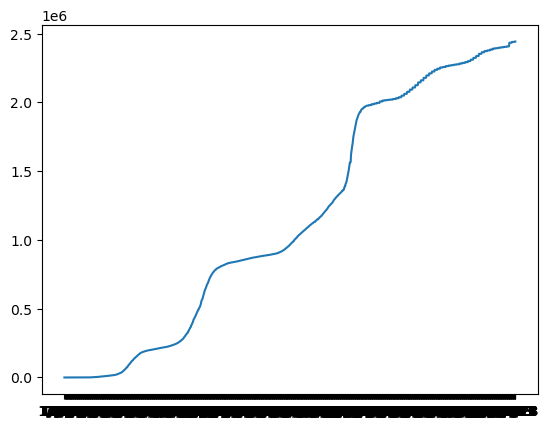

In [37]:
covid_df_Arizona = covid_df[covid_df['Province_State'] == 'Arizona']
list_of_date_Arizona = covid_df_Arizona.columns[11:].to_list()

# covid_df_Alabama.groupby(list_of_date).sum()
sum_list_Arizona = []
for col in list_of_date_Arizona:
    sum_list_Arizona.append(covid_df_Arizona[str(col)].sum())

plt.plot(list_of_date_Arizona, sum_list_Arizona, linestyle='-')

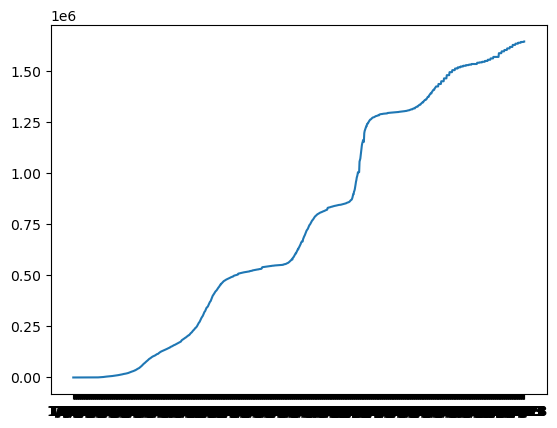

In [38]:
covid_df_Alabama = covid_df[covid_df['Province_State'] == 'Alabama']
list_of_date_alabama = covid_df_Alabama.columns[11:].to_list()

# covid_df_Alabama.groupby(list_of_date).sum()
sum_list_alabama = []
for col in list_of_date_alabama:
    sum_list_alabama.append(covid_df_Alabama[str(col)].sum())

plt.plot(list_of_date_alabama, sum_list_alabama, linestyle='-')

In [61]:
def get_sum(city):
    covid_df_city = covid_df[covid_df['Province_State'] == str(city)]
    list_of_date_city = covid_df_city.columns[11:].to_list()

    # covid_df_Alabama.groupby(list_of_date).sum()
    sum_list_city = []
    for col in list_of_date_city:
        sum_list_city.append(covid_df_city[str(col)].sum())
    return sum_list_city



e. Show the total confirmed cases for all the locations in an interactive world map (hint: you may use `leaflet` package in `python`.


In [45]:
pip install folium


     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/102.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/102.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/102.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/102.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/102.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/102.3 kB ? eta -:--:--
     ----------- -------------------------- 30.7/102.3 kB 77.0 kB/s eta 0:00:01
     ----------- -------------------------- 30.7/102.3 kB 77.0 kB/s eta 0:00:01
     ----------- -------------------------- 30.7/102.3 kB 77.0 kB/s eta 0:00:01
     --------------- ---

In [46]:
# TODO
import folium
from folium import plugins

In [69]:
# latitude = covid_df['Lat']
# longitude = covid_df['Long_']
# initial_lat = covid_df['Lat'].iloc[0]
# initial_lon = covid_df['Long_'].iloc[0]

# m = folium.Map(location=[initial_lat, initial_lon], zoom_start=10)

In [70]:
# list_of_cities = covid_df['Province_State'].unique()
# list_of_dates = covid_df.columns[11:].to_list()
# list_of_counts = []
# for city in list_of_cities:
#     count = get_sum(city)  # Replace get_sum(city) with the actual function to calculate the count
#     list_of_counts.append(count)
# list_of_counts = [get_sum(city) for city in list_of_cities]  # Replace get_sum(city) with the actual function to calculate the count


In [71]:
# for date, city, count in zip(list_of_dates, list_of_cities, list_of_counts):
#     folium.CircleMarker(
#         location=[city_latitude, city_longitude],
#         radius=count * scaling_factor,  # Adjust the scaling factor as needed
#         color='blue',
#         fill=True,
#         fill_color='blue',
#         fill_opacity=0.6,
#         popup=f"{city}: {count} observations on {date}"
#     ).add_to(m)


In [74]:
import folium

# Assuming you have latitude and longitude columns in your DataFrame named 'Lat' and 'Long_'
latitude = covid_df['Lat']
longitude = covid_df['Long_']
initial_lat = covid_df['Lat'].iloc[0]
initial_lon = covid_df['Long_'].iloc[0]

m = folium.Map(location=[initial_lat, initial_lon], zoom_start=10)

list_of_cities = covid_df['Province_State'].unique()
list_of_dates = covid_df.columns[11:].to_list()

for city in list_of_cities:
    city_data = covid_df[covid_df['Province_State'] == city]
    city_latitude = city_data['Lat'].iloc[0]
    city_longitude = city_data['Long_'].iloc[0]
    
    list_of_counts = [get_sum(city) for city in list_of_cities]  # Replace get_sum(city) with the actual function to calculate the count
    
    for date, count in zip(list_of_dates, list_of_counts):
        folium.CircleMarker(
            location=[city_latitude, city_longitude],
            radius=count * 10,  # Adjust the scaling factor as needed
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"{city}: {count} observations on {date}"
        ).add_to(m)
m.save('map.html')

TypeError: Object of type int64 is not JSON serializable